In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('D:\\DC Universe\\Ucsc\\Fourth Year\\Cousera Work\\Management Accounting\\Savindri Management SPSS\Visual Merchandise.csv')

In [3]:
df_train.shape

(330, 31)

**In this Application we a using Quantifiers for qualitative Variable**:-
   > Strong Disagree :- 1
   
   > Disagree        :- 2
   
   > Neutral         :- 3
   
   > Agree           :- 4
   
   > Strongly Agree  :- 5
    

In [4]:
#check the decoration
df_train.columns

Index(['Gender', 'Age', 'Educational qualification', 'Are you',
       'Your Monthly Income ', 'Residential Province',
       'Are you purchasing products from Supermarkets',
       'Frequency of purchase / average shopping',
       'If yes what is the major super markets that you are using',
       'I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.',
       'I will purchase FMCG products from supermarkets in the near future',
       'I will recommend others to purchase FMCG products from supermarkets',
       'I will try to purchase FMCG products from supermarkets',
       'I look for in-store advertisements',
       'Promotional offers and signage on Supermarkets gain my attention',
       'I purchase FMCG products based on the special offers that are put inside stores',
       'I purchase more FMCG products unintentionally which are on sale',
       'The promotional display attract me to visit the supermarket again',
       'Brightly lit supermarke

Variable - Variable name.

**Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

**Segment** - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

**Expectation** - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

**Comments** - Any general comments that occured to us.

## Don't Run This Code Segments , Run From the Breakpoint that I am mentioned in the later part of the Code

In [5]:
#descriptive statistics summary
df_train['Frequency of purchase / average shopping'].nunique() 

6

In [6]:
df_train['Frequency of purchase / average shopping'].unique() 

array(['Once a week', 'Once a month', '3 times a week', '4 times a week',
       '2 times a week', 'Never'], dtype=object)

In [7]:
#descriptive statistics summary
df_train['Residential Province'].unique() 

array(['Northern Province', 'Western Province', 'North Western Province',
       'Central Province', 'Sabaragamuwa Province', 'Uva Province',
       'Southern Province', 'North Central Province', 'Eastern Province'],
      dtype=object)

In [8]:
df_train['Educational qualification'].unique() 

array(['Diploma holders', 'Undergraduate', 'Graduate', 'MSc and above',
       'O/ls / A/Ls'], dtype=object)

In [9]:
#descriptive statistics summary
df_train['Frequency of purchase / average shopping'].unique() 

array(['Once a week', 'Once a month', '3 times a week', '4 times a week',
       '2 times a week', 'Never'], dtype=object)

In [10]:
df_train['If yes what is the major super markets that you are using'].unique() 

array(['Keells', 'Laugfs Supermarket', 'Cargills Food City', 'Sathosa',
       'Spar Supermarket', 'Softlogic Glomark', 'Arpico Super Centre',
       'Other'], dtype=object)

In [11]:
df_train['I will purchase FMCG products from supermarkets in the near future'].unique() 

array([1], dtype=int64)

In [12]:
#descriptive statistics summary
df_train['Your Monthly Income '].unique() 

array(['50,000-75,000', '25,000-50,000', 'Below 25,000',
       '75,000 and above'], dtype=object)

In [13]:
df_train.head(3)

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,Female,45-54,Diploma holders,Employed,"50,000-75,000",Northern Province,Yes,Once a week,Keells,4,...,4,4,4,3,4,4,5,4,4,3
1,Male,15-24,Undergraduate,Un-employed,"25,000-50,000",Western Province,Yes,Once a month,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5
2,Male,15-24,Undergraduate,Un-employed,"25,000-50,000",Western Province,Yes,Once a month,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5


In [14]:
vals_to_replace = {'Diploma holders' : '2','O/ls / A/Ls': '1','MSc and above':'5','Undergraduate':'3','Graduate':'4'}
df_train['Educational qualification'] = df_train['Educational qualification'].map(vals_to_replace)


In [15]:
df_train

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,Female,45-54,2,Employed,"50,000-75,000",Northern Province,Yes,Once a week,Keells,4,...,4,4,4,3,4,4,5,4,4,3
1,Male,15-24,3,Un-employed,"25,000-50,000",Western Province,Yes,Once a month,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5
2,Male,15-24,3,Un-employed,"25,000-50,000",Western Province,Yes,Once a month,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5
3,Female,15-24,3,Un-employed,"Below 25,000",Western Province,Yes,3 times a week,Keells,5,...,3,4,3,4,5,4,3,4,4,5
4,Female,15-24,3,Un-employed,"Below 25,000",North Western Province,No,4 times a week,Keells,4,...,4,4,2,3,4,4,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Female,15-24,1,Un-employed,"Below 25,000",North Western Province,Yes,Once a month,Sathosa,4,...,5,4,4,4,4,4,4,5,4,4
326,Female,35-44,5,Un-employed,"50,000-75,000",Central Province,Yes,Once a week,Cargills Food City,4,...,5,4,4,5,4,4,4,4,4,4
327,Male,35-44,5,Employed,"50,000-75,000",Western Province,Yes,2 times a week,Cargills Food City,2,...,2,2,2,2,2,2,2,2,2,2
328,Male,15-24,3,Un-employed,"Below 25,000",Western Province,Yes,Once a month,Keells,4,...,4,5,5,5,3,3,5,5,3,4


In [16]:
vals_to_replace2 = {'4 times a week' : '4','3 times a week': '3','Once a week':'2','Once a month':'1'}
df_train['Frequency of purchase / average shopping'] = df_train['Frequency of purchase / average shopping'].map(vals_to_replace2)

In [17]:
df_train.head(3)

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,Female,45-54,2,Employed,"50,000-75,000",Northern Province,Yes,2,Keells,4,...,4,4,4,3,4,4,5,4,4,3
1,Male,15-24,3,Un-employed,"25,000-50,000",Western Province,Yes,1,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5
2,Male,15-24,3,Un-employed,"25,000-50,000",Western Province,Yes,1,Laugfs Supermarket,3,...,2,5,2,1,3,2,1,3,2,5


In [25]:
df_train['Age'].unique() 

array(['45-54', '15-24', '25-34', '55 above', '35-44'], dtype=object)

# Run the Code From Here 

### Provinces
- 'Northern Province', =1
-  'Western Province', =2
 - 'North Western Province',=3
 - 'Central Province', =4
-  'Sabaragamuwa Province', =5
-  'Uva Province',=6
-   'Southern Province', =7
 - 'North Central Province',=8
-  'Eastern Province'=9

### Ages:-
- '45-54' =4
- '15-24', =1
- '25-34', =2
- '55 above', =5
- '35-44' =3

### Super Markets:-
- 'Keells',           =1
- 'Laugfs Supermarket', =2
- 'Cargills Food City', =3
- 'Sathosa',            =4
- 'Spar Supermarket',   =5
- 'Softlogic Glomark',  =6
- 'Arpico Super Centre',=7
- 'Other'               =8

### Qualification
- 'Diploma holders' : '2'
- 'O/ls / A/Ls': '1'
- 'MSc and above':'5'
- 'Undergraduate':'3'
- 'Graduate':'4'

### Monthly Income :-
- '50,000-75,000'=3
- '25,000-50,000'=2
- 'Below 25,000',=1
- '75,000 and above'=4

### Regularity:-
- '4 times a week' : '5'
- '3 times a week': '4'
- 'Once a week':'2'
- 'Once a month':'1'
- 2 times a week:-3
- Never :-0

In [5]:
df_train['Are you'].unique() 

array(['Employed', 'Un-employed'], dtype=object)

In [6]:
vals_to_replace3 = {'Employed' : '5','Un-employed': '1'}
df_train['Are you'] = df_train['Are you'].map(vals_to_replace3)

In [7]:
df_train

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,Female,4,2,5,3,1,1,2,1,4,...,4,4,4,3,4,4,5,4,4,3
1,Male,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
2,Male,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
3,Female,1,3,1,1,2,1,5,1,5,...,3,4,3,4,5,4,3,4,4,5
4,Female,1,3,1,1,3,0,5,1,4,...,4,4,2,3,4,4,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Female,1,1,1,1,3,1,1,4,4,...,5,4,4,4,4,4,4,5,4,4
326,Female,3,5,1,3,4,1,2,3,4,...,5,4,4,5,4,4,4,4,4,4
327,Male,3,5,5,3,2,1,5,3,2,...,2,2,2,2,2,2,2,2,2,2
328,Male,1,3,1,1,2,1,1,1,4,...,4,5,5,5,3,3,5,5,3,4


In [8]:
df_train = df_train.fillna(1)

In [9]:
df_train

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,Female,4,2,5,3,1,1,2,1,4,...,4,4,4,3,4,4,5,4,4,3
1,Male,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
2,Male,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
3,Female,1,3,1,1,2,1,5,1,5,...,3,4,3,4,5,4,3,4,4,5
4,Female,1,3,1,1,3,0,5,1,4,...,4,4,2,3,4,4,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Female,1,1,1,1,3,1,1,4,4,...,5,4,4,4,4,4,4,5,4,4
326,Female,3,5,1,3,4,1,2,3,4,...,5,4,4,5,4,4,4,4,4,4
327,Male,3,5,5,3,2,1,5,3,2,...,2,2,2,2,2,2,2,2,2,2
328,Male,1,3,1,1,2,1,1,1,4,...,4,5,5,5,3,3,5,5,3,4


In [10]:
df_train['Gender'].unique() 

array(['Female', 'Male'], dtype=object)

In [11]:
vals_to_replace4 = {'Male' : '1','Female': '0'}
df_train['Gender'] = df_train['Gender'].map(vals_to_replace4)

In [12]:
df_train

,Gender,Age,Educational qualification,Are you,Your Monthly Income,Residential Province,Are you purchasing products from Supermarkets,Frequency of purchase / average shopping,If yes what is the major super markets that you are using,I would like to purchase FMCG (fast moving consumer goods) products in supermarkets.,...,The use of lights in different colors and brightness to decorate the supermarket would\nattract to products which are clearly seen and swing my mood towards buying,Good lighting encourage me to visit the supermarket,I purchase FMCG products from supermarkets because of the way they are arranged in the\nshelves,"When there is an eye catching display, I end up purchasing that product",I like purchasing products that are displayed on the billing counter,I purchase products from the supermarket based on convenience of the product placed,A good supermarket layout makes me easy to find desired products,Store layout which will allow to move easily,I buy products based only after looking around completely,I tend to buy more products that are catchy to me when I pass aisles(passenger pathway)
0,0,4,2,5,3,1,1,2,1,4,...,4,4,4,3,4,4,5,4,4,3
1,1,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
2,1,1,3,1,2,2,1,1,2,3,...,2,5,2,1,3,2,1,3,2,5
3,0,1,3,1,1,2,1,5,1,5,...,3,4,3,4,5,4,3,4,4,5
4,0,1,3,1,1,3,0,5,1,4,...,4,4,2,3,4,4,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,1,1,1,1,3,1,1,4,4,...,5,4,4,4,4,4,4,5,4,4
326,0,3,5,1,3,4,1,2,3,4,...,5,4,4,5,4,4,4,4,4,4
327,1,3,5,5,3,2,1,5,3,2,...,2,2,2,2,2,2,2,2,2,2
328,1,1,3,1,1,2,1,1,1,4,...,4,5,5,5,3,3,5,5,3,4


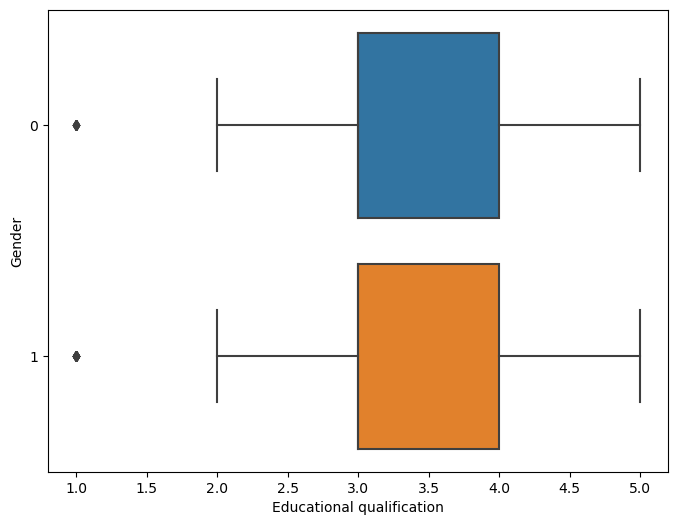

In [15]:
#box plot overallqual/saleprice
var = 'Educational qualification'
data = pd.concat([df_train['Gender'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Gender", data=data)


# 0=> Female  1=> Male

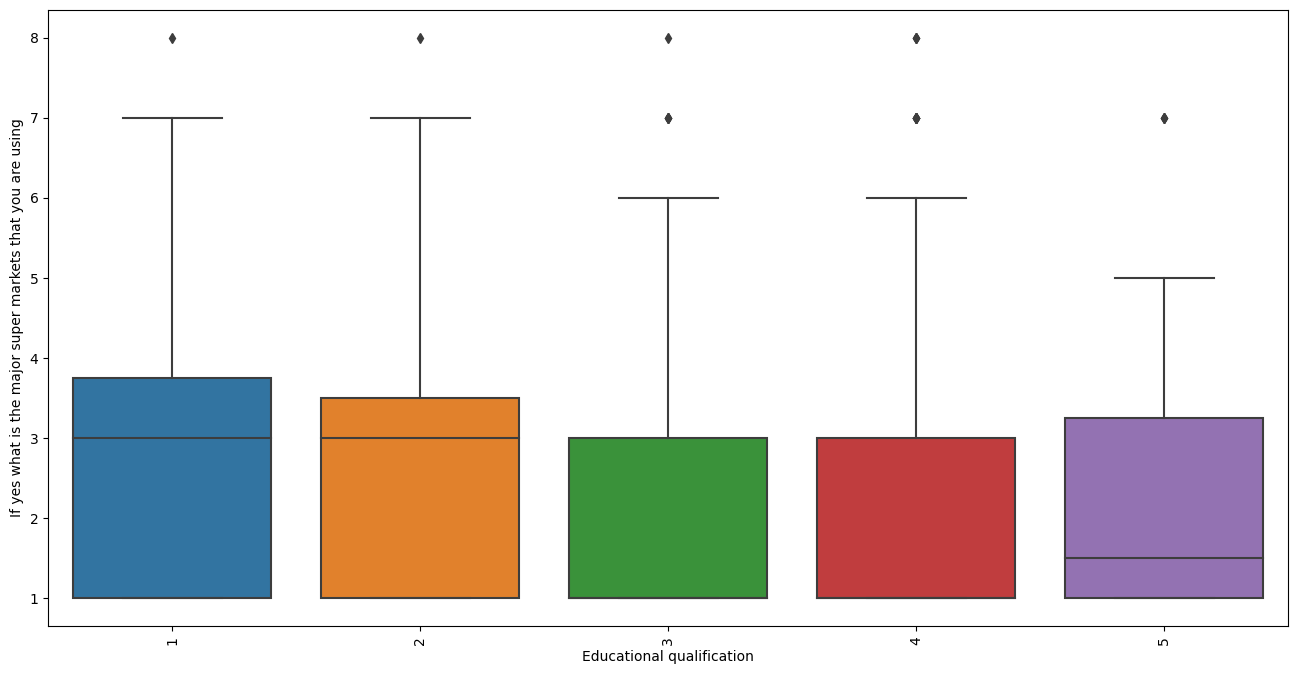

In [16]:
var = 'Educational qualification'
data = pd.concat([df_train['If yes what is the major super markets that you are using'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="If yes what is the major super markets that you are using", data=data)
plt.xticks(rotation=90);

### Correlation matrix (heatmap style)

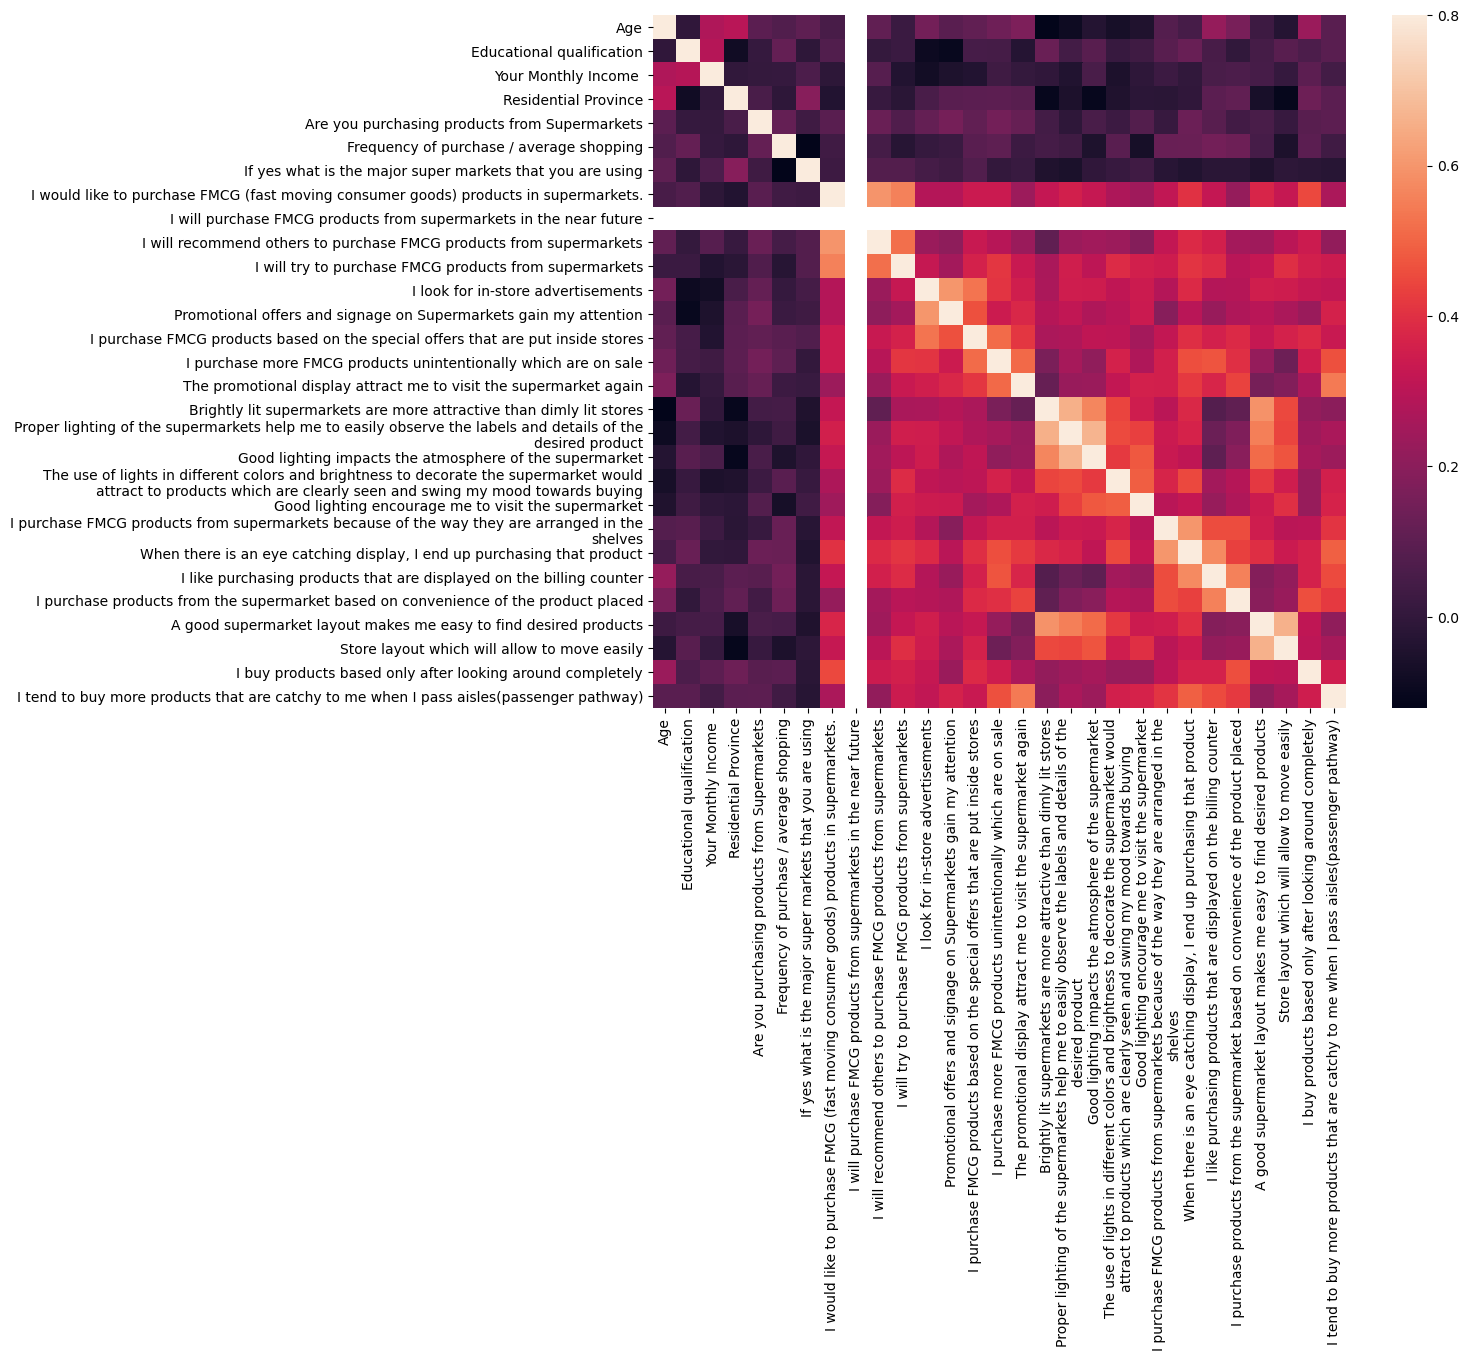

In [17]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

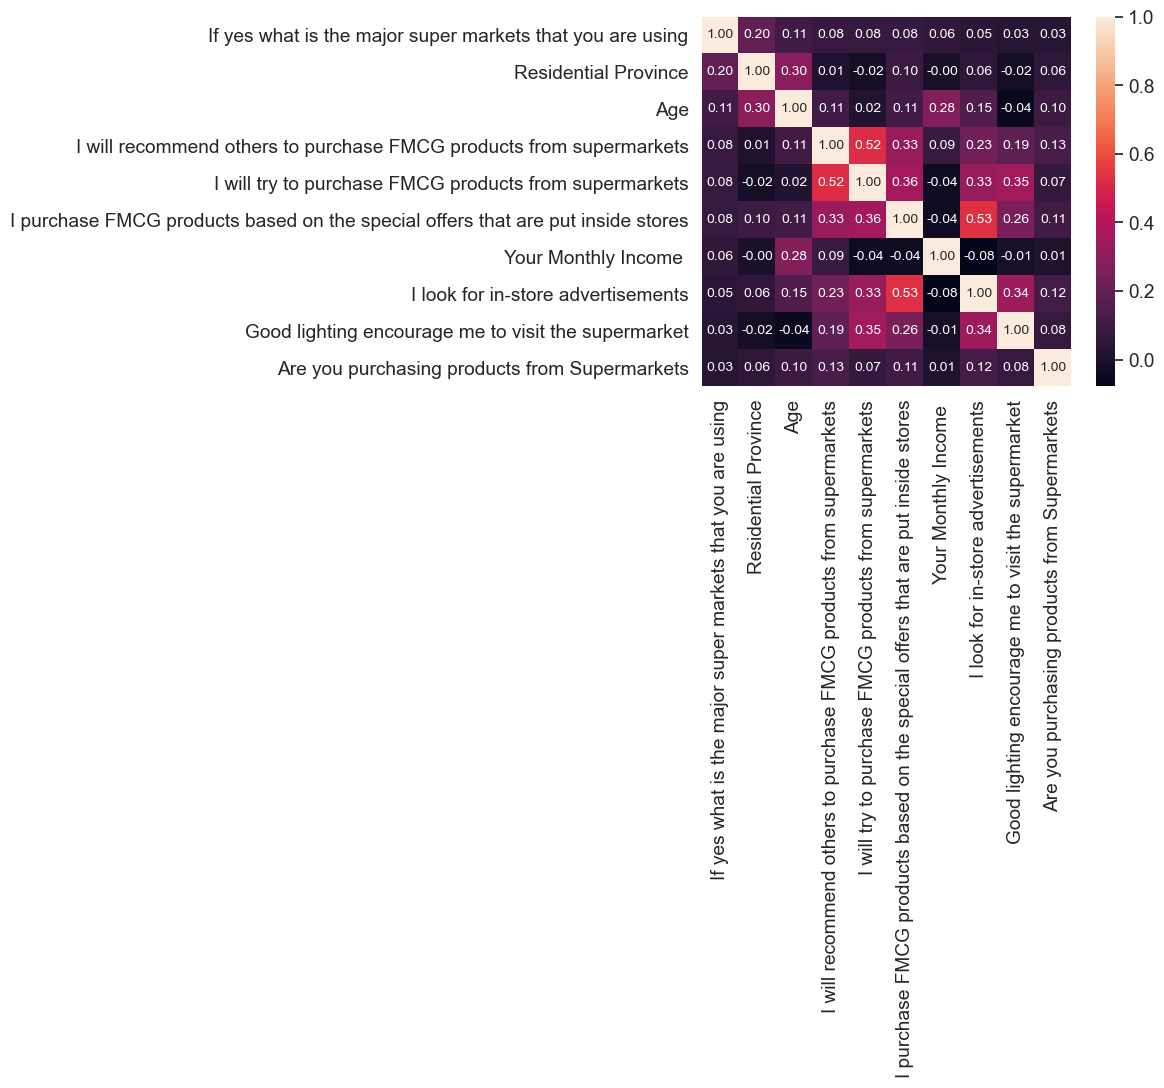

In [18]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'If yes what is the major super markets that you are using')['If yes what is the major super markets that you are using'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plots between 'Supermarket' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

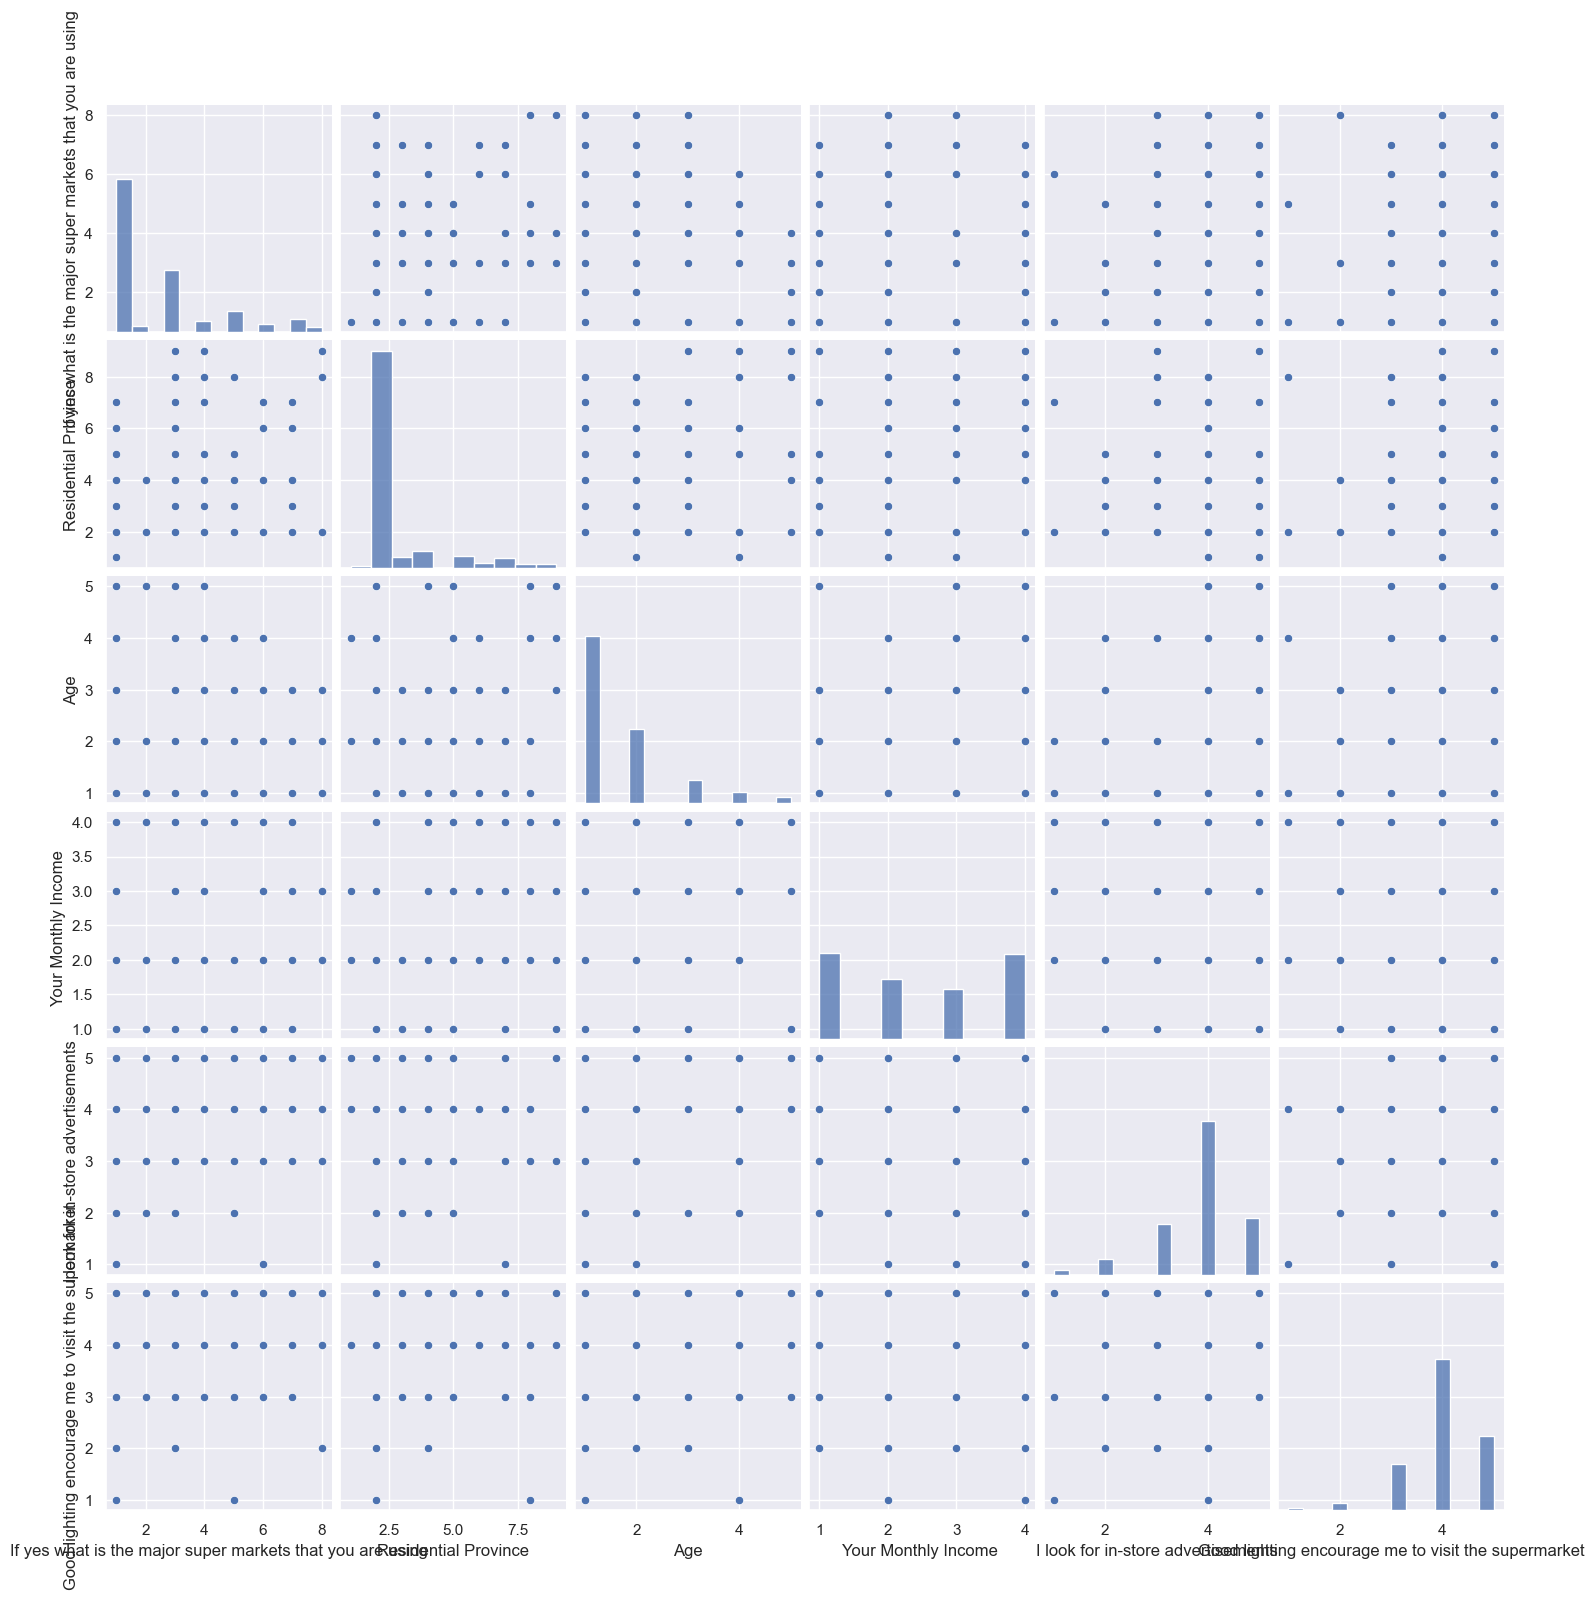

In [19]:
#scatterplot
sns.set()
cols = ['If yes what is the major super markets that you are using', 'Residential Province', 'Age', 'Your Monthly Income ', 'I look for in-store advertisements', 'Good lighting encourage me to visit the supermarket', 'Gender']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [21]:
supermarket_variety = StandardScaler().fit_transform(df_train['If yes what is the major super markets that you are using'][:,np.newaxis]);
low_range = supermarket_variety[supermarket_variety[:,0].argsort()][:10]
high_range= supermarket_variety[supermarket_variety[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]
 [-0.7510275]]

outer range (high) of the distribution:
[[2.34696093]
 [2.34696093]
 [2.34696093]
 [2.34696093]
 [2.86329234]
 [2.86329234]
 [2.86329234]
 [2.86329234]
 [2.86329234]
 [2.86329234]]


'Supermarket' looks with new user:

Low range values are similar and not too far from 0.
High range values are far from 0 and the 2.something values are really out of range.
For now, we'll not consider any of these values as an outlier 

### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


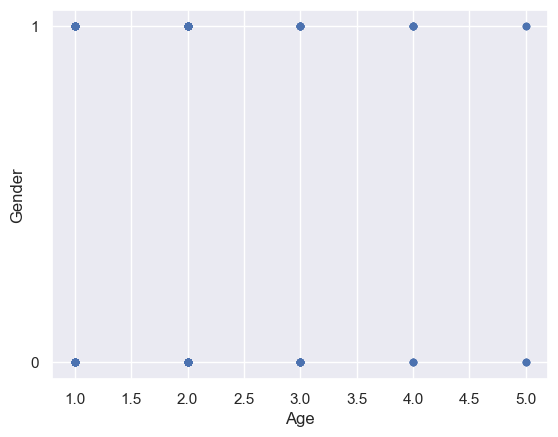

In [26]:
#bivariate analysis saleprice/grlivarea
var = 'Gender'
data = pd.concat([df_train['Age'], df_train[var]], axis=1)
data.plot.scatter(x='Age', y=var);

## Bar Charts

In [30]:
y=df_train['Gender']

Number of Females:  158
Number of Males :  172


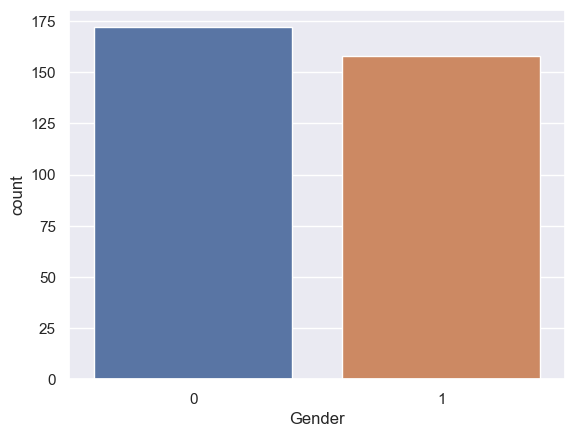

In [31]:
ax = sns.countplot(y,label="Count")       # Male=158, Female = 172
Male, Female , = y.value_counts()
print('Number of Females: ',Female)
print('Number of Males : ',Male)

### Multivarient Correlation

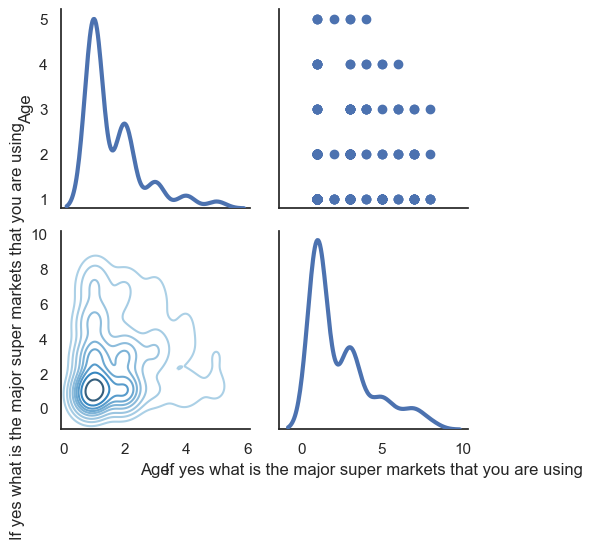

In [33]:
sns.set(style="white")
df = df_train.loc[:,['Age','Gender','If yes what is the major super markets that you are using']]
g = sns.PairGrid(df , diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)